In [9]:
# IMPORTS

from GridClass import *

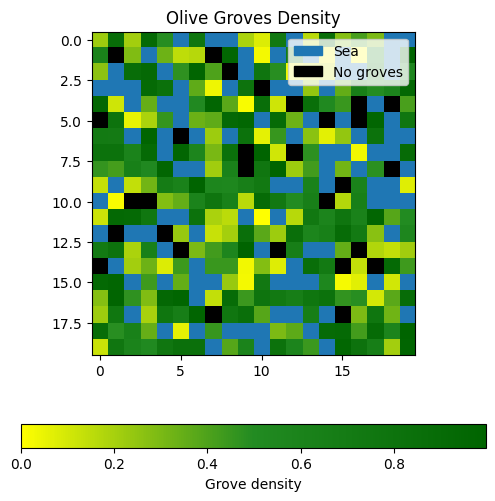

In [10]:
# CREATE OLIVE GROVE DENSITY, FROM FILE OR RANDOMLY GENERATED

np.random.seed(5)

FROM_FILE = False

if FROM_FILE:
    file_path = "olivegrowthprop.mat"
    mat = sp.io.loadmat(file_path)
    GRID = Grid(density=mat["olivegrowthprop"])

else:
    H = 20
    W = 20
    GRID = Grid(shape=(H,W))

# PLOT DISTRIBUTION OF OLIVE GROVES
GRID.plot_density(figsize=(6,6))

In [11]:
# SET CONTROL ZONE

if FROM_FILE:
    GRID.set_control_zone(EZW=20, BZW=13)
    GRID.plot_density(figsize=(6,6))

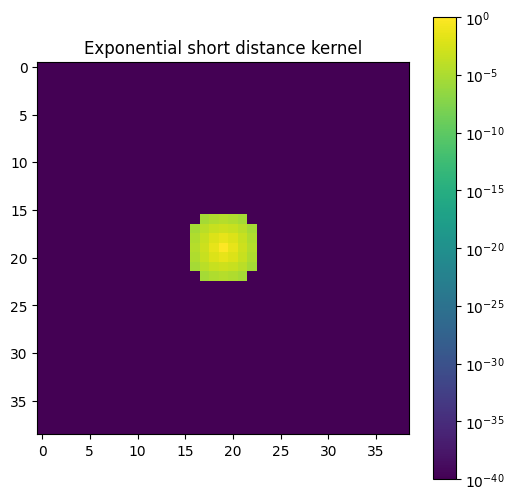

In [12]:
# SHORT DISTANCE KERNEL

beta = 0.1
GRID.set_short_distance_kernel(beta)
GRID.plot_short_distance_kernel(figsize=(6,6))

In [13]:
# SET MODEL PARAMETERS

np.random.seed(13340)

# Common parameters
A = 3 # 3 kp rate of population growth
B = 14.069
a = 0 # relative carrying capacity in non olive plants
tol = 1e-8 # 1e-8 numerical noise tolerance (IF TOLERANCE IS TOO BIG, IT CAN HAPPEN THAT THE SIMULATION IS TRUNCATED AT THE FIRST ITERATION)

# Short distance kernel
beta = 0.1

# Long distance kernel
disp_tol = 0.2 # 0.2 strattol stratified dispersal tolerance (threshold probability)
M_max = 5 # 5 maximum number of dispersers
D = 20 # 20 dispersal standard deviation

# Levy flight
n_vectors = 100
d_min = 0.1
alpha = 2
sample = "power"

# Define parameter dictionary
parameters = {'common': [A, B, a, tol],
              'short_long': [beta, disp_tol, M_max, D],
              'levy_flight': [n_vectors, d_min, alpha, sample]}

timesteps = 50
dispersal_type = "levy_flight"

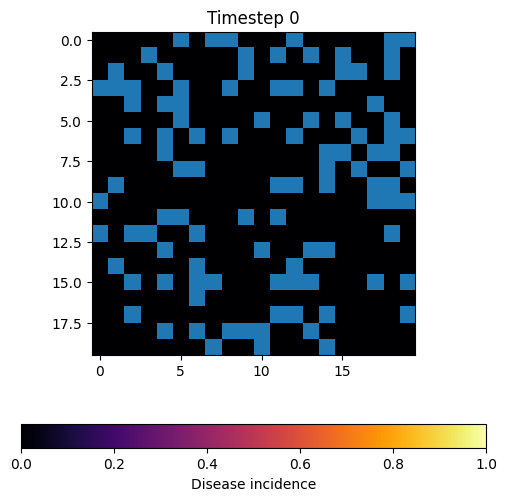

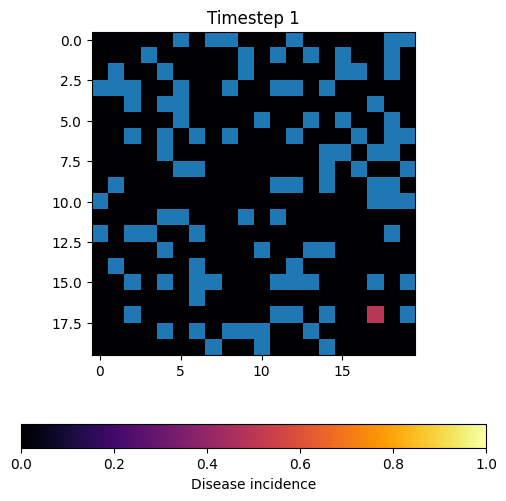

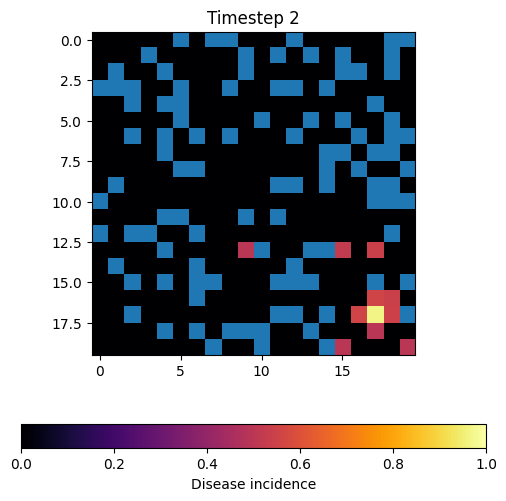

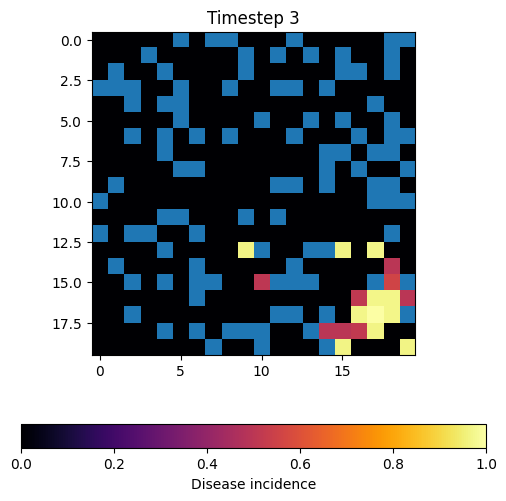

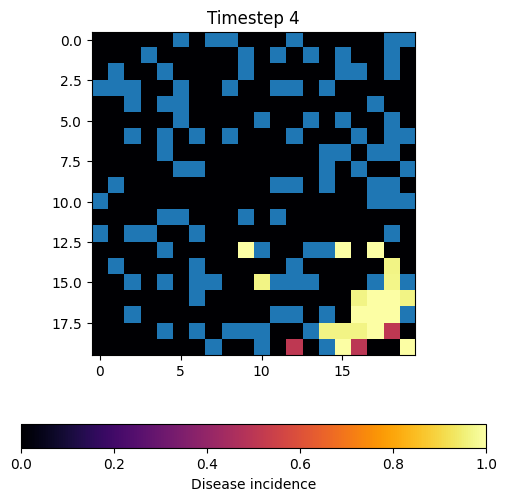

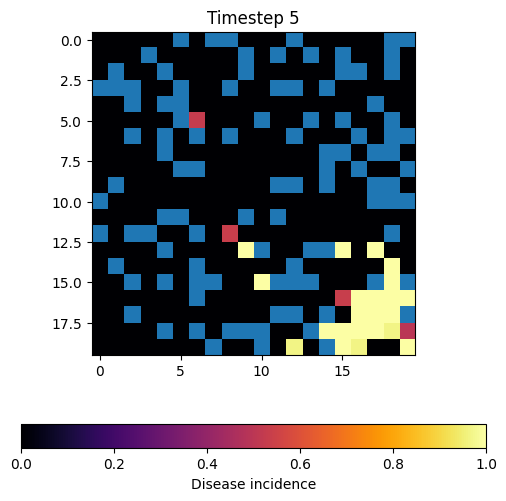

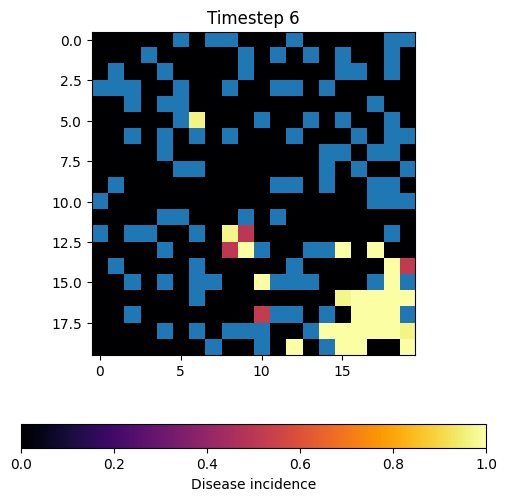

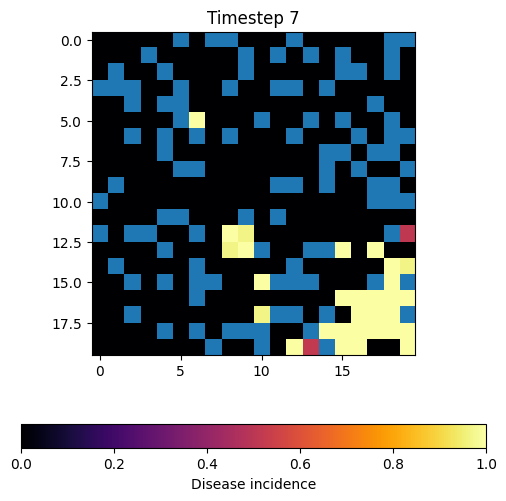

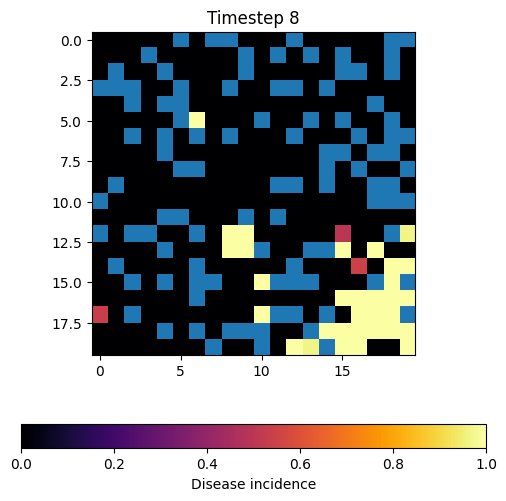

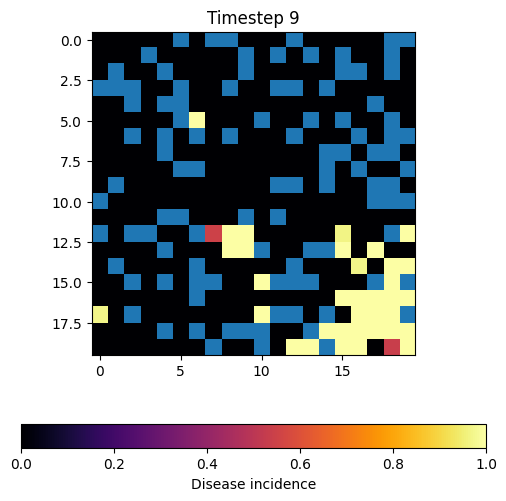

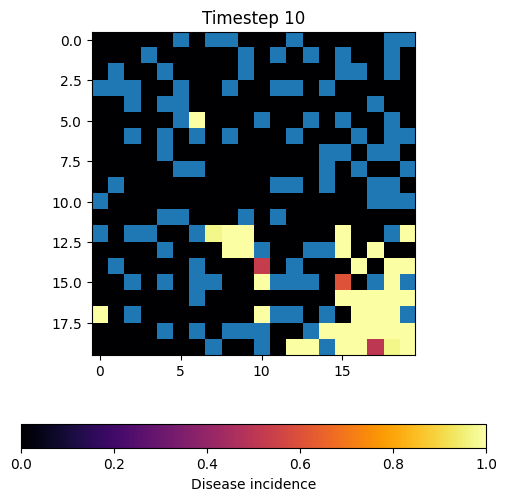

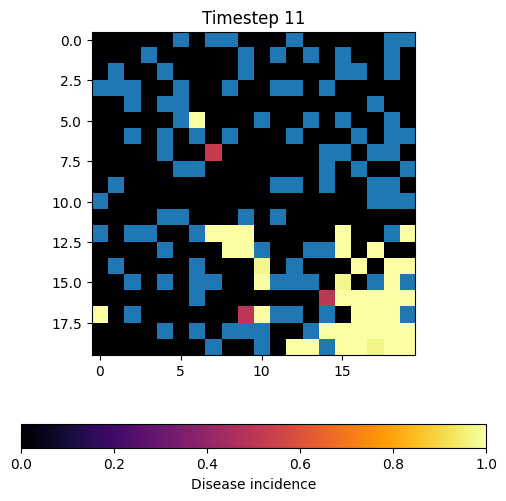

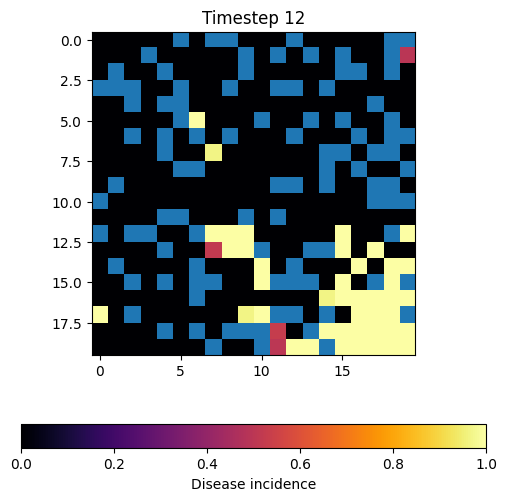

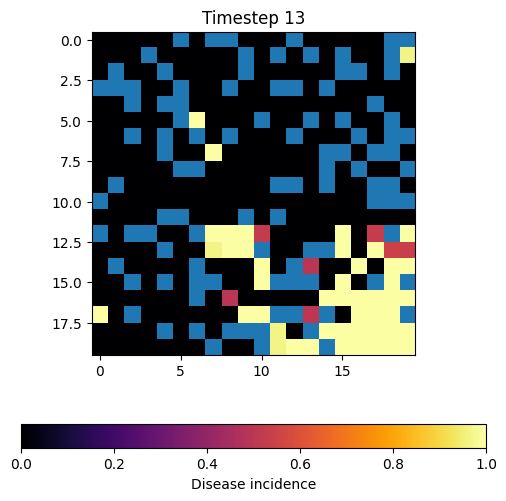

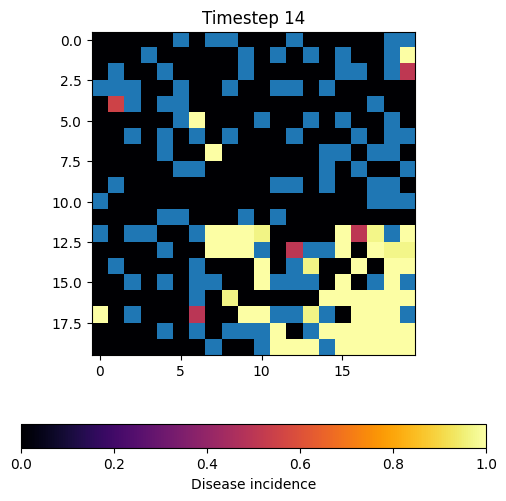

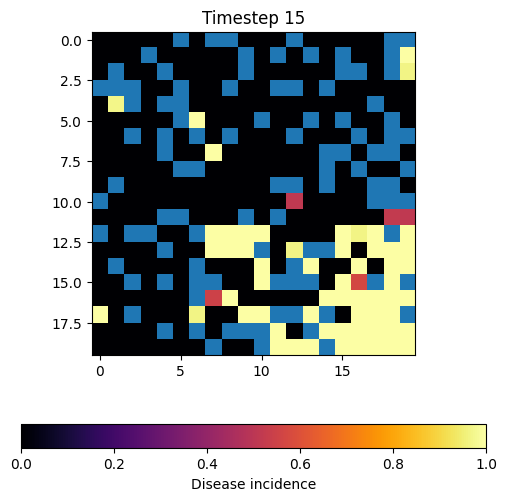

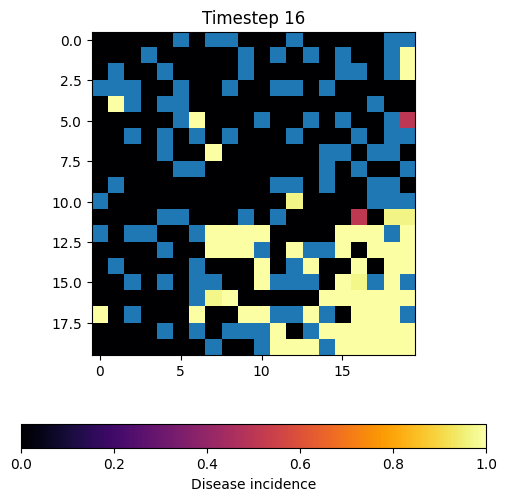

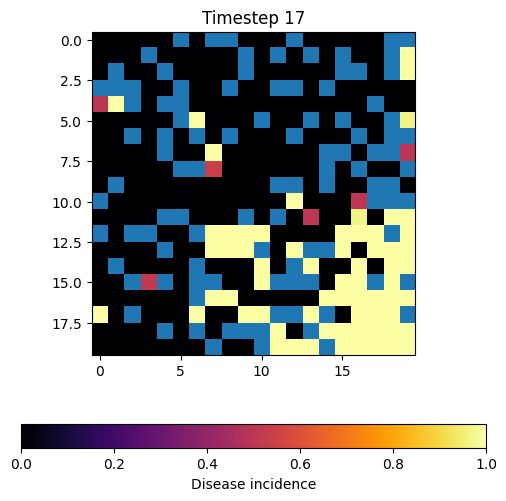

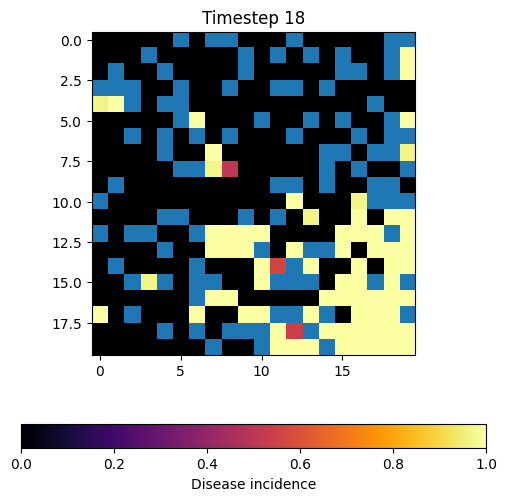

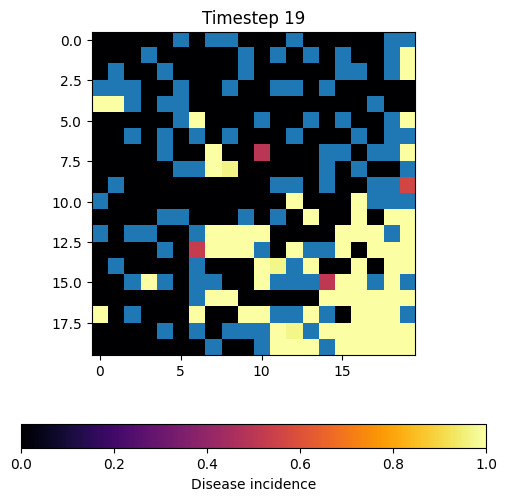

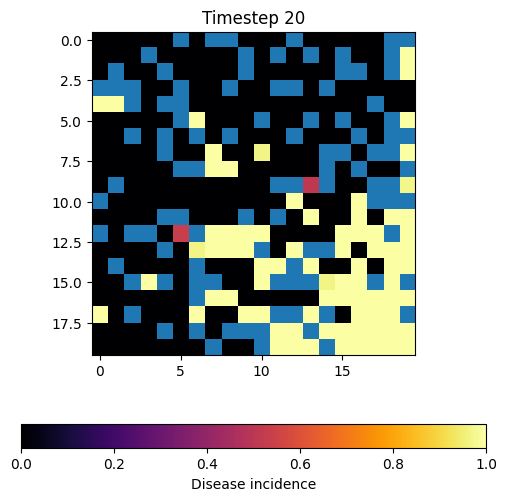

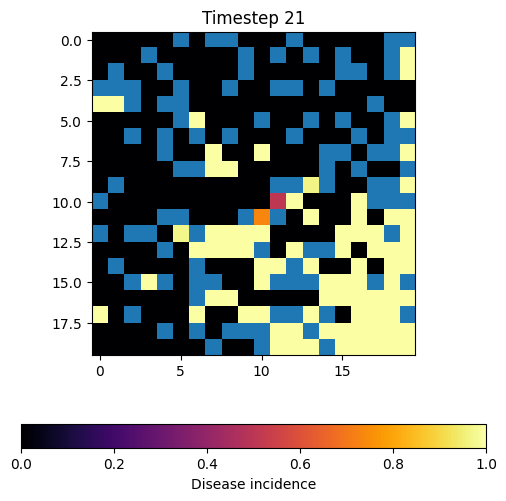

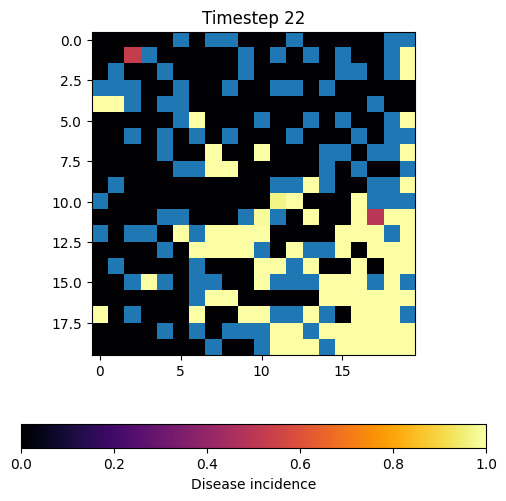

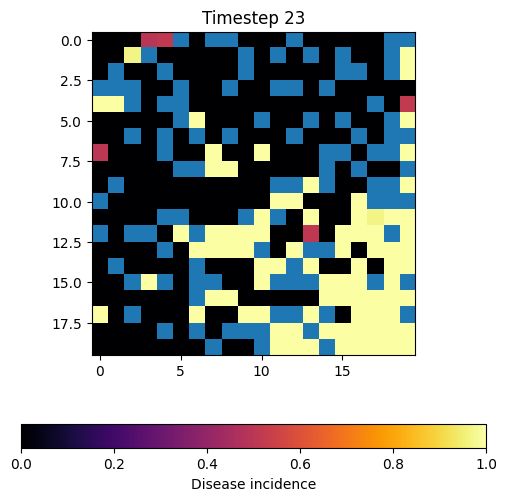

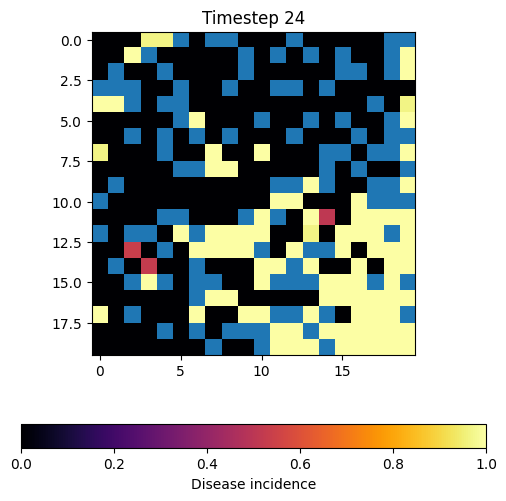

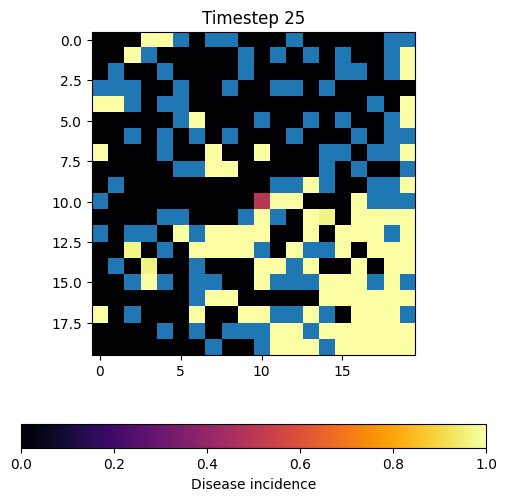

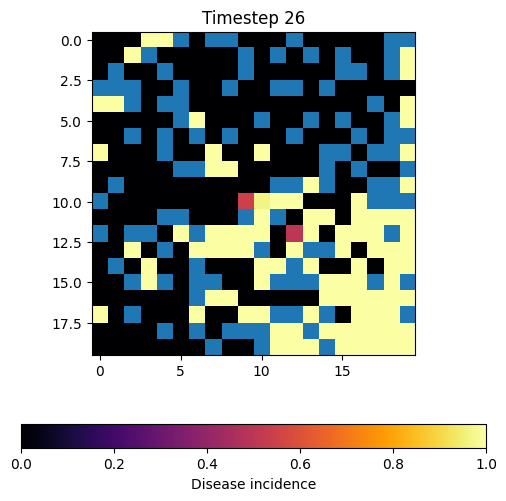

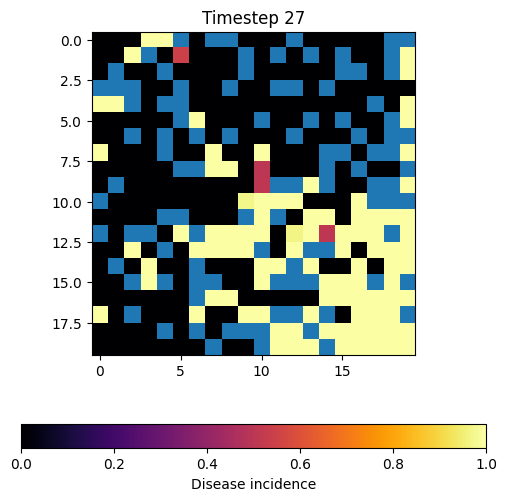

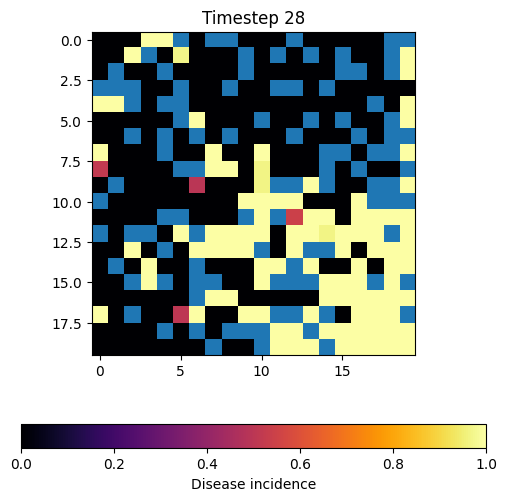

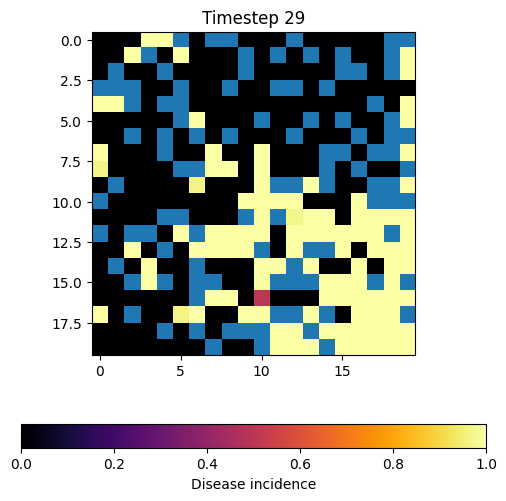

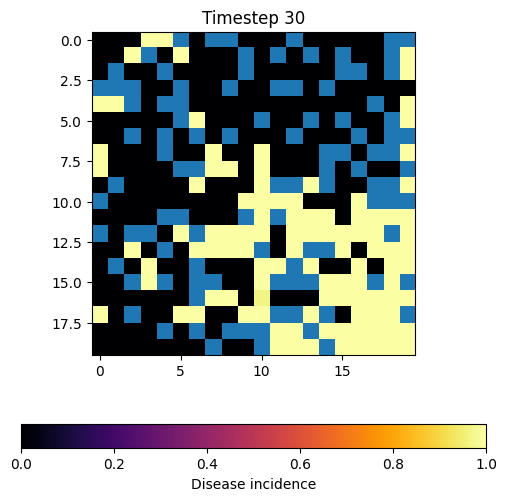

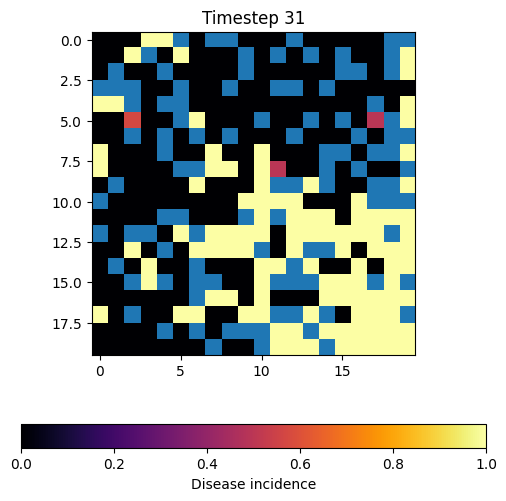

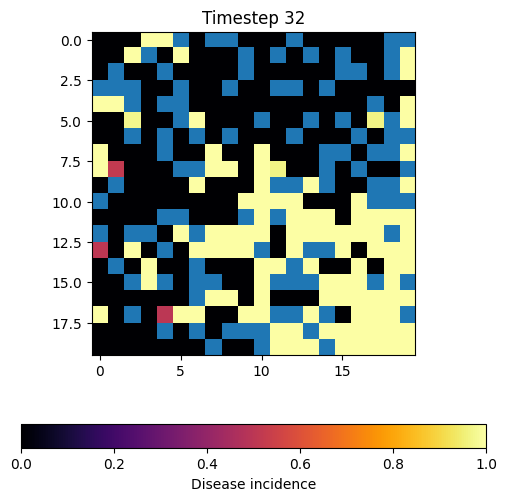

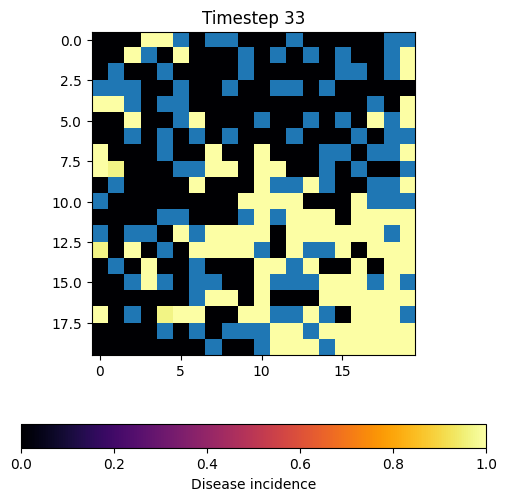

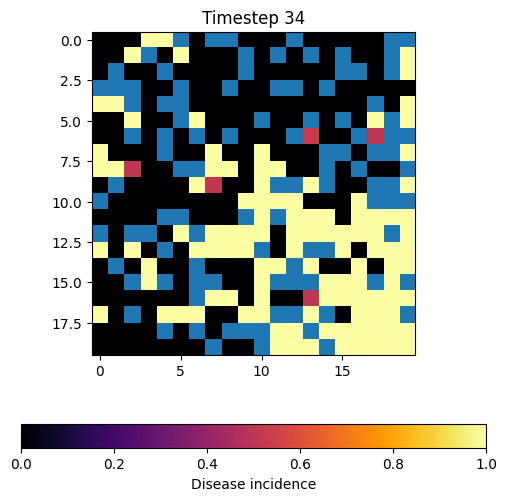

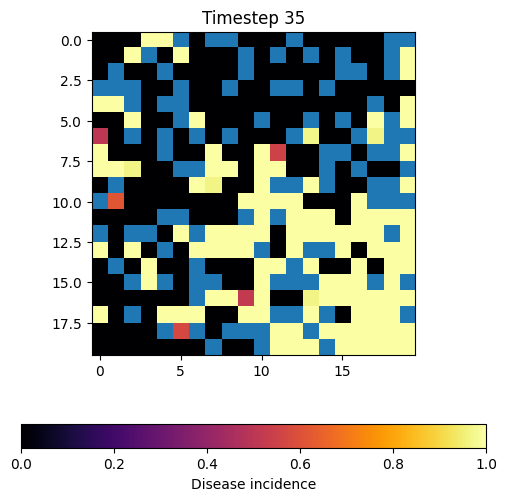

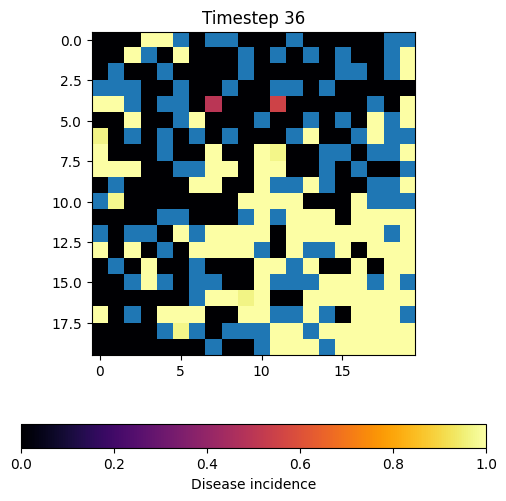

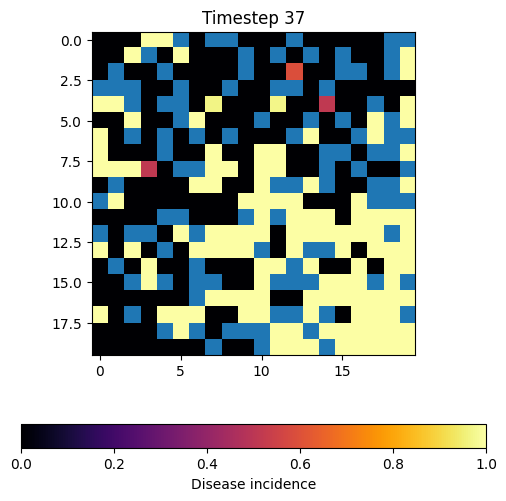

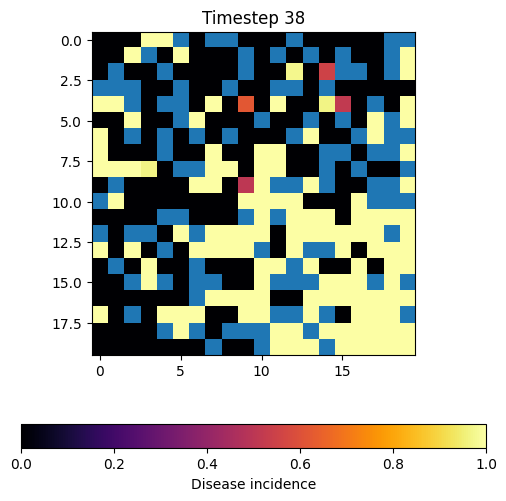

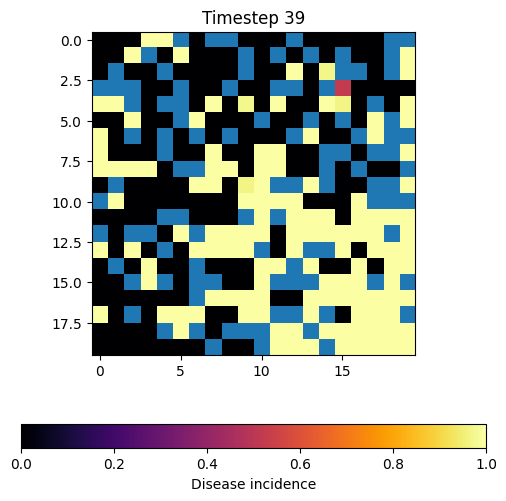

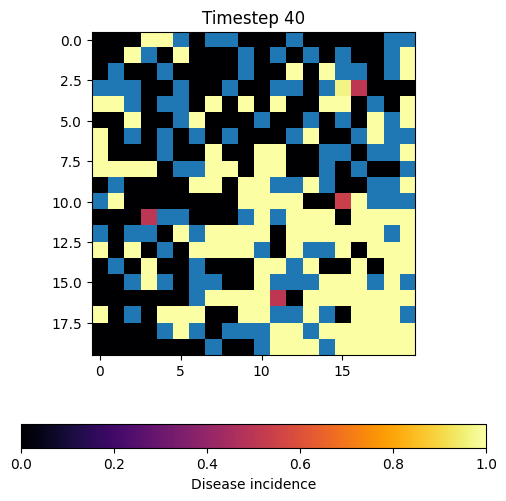

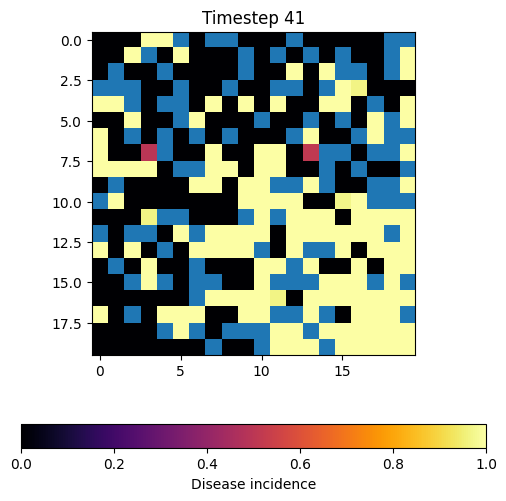

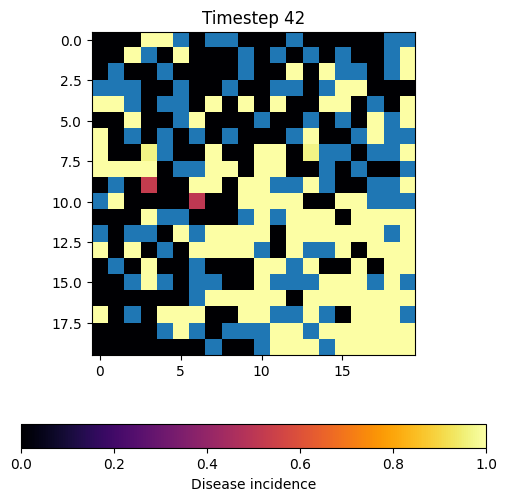

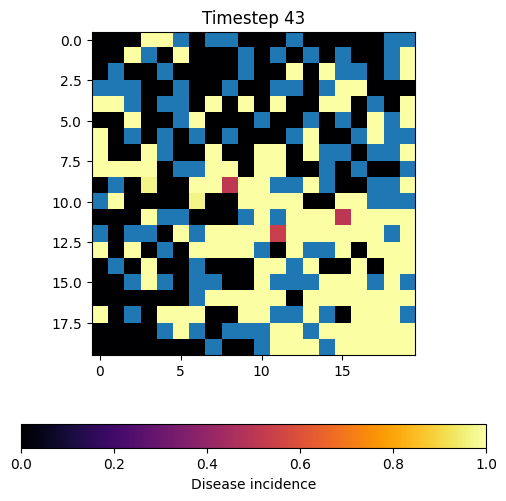

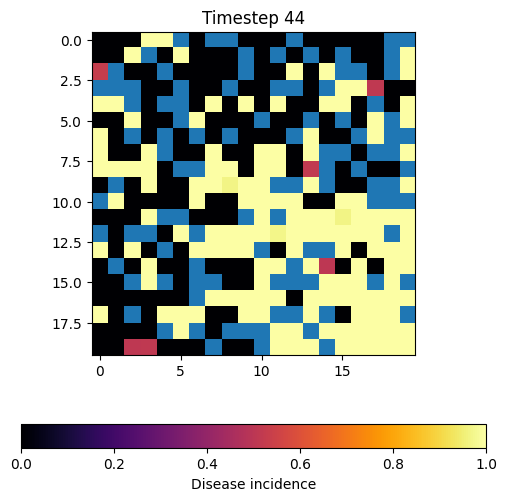

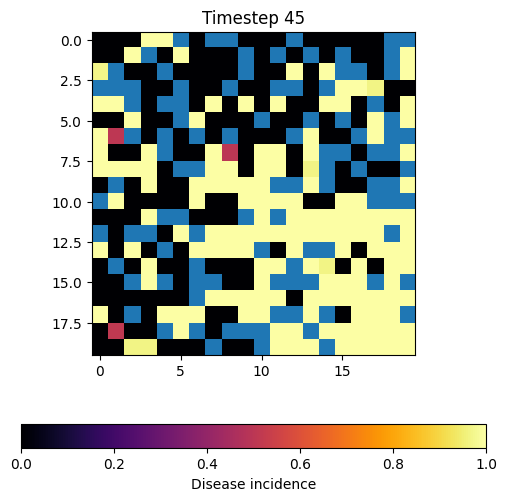

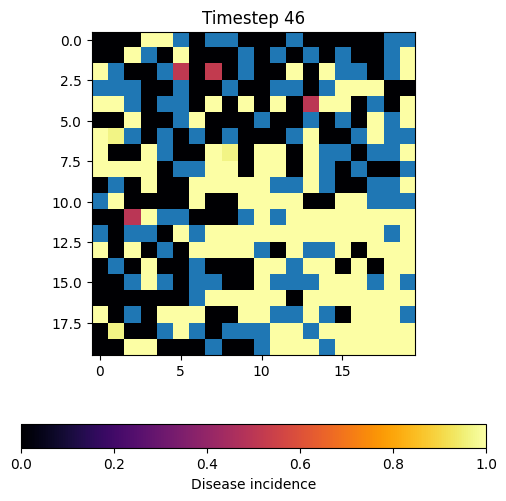

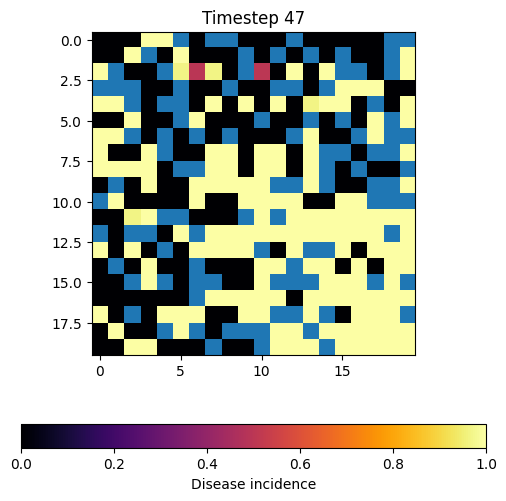

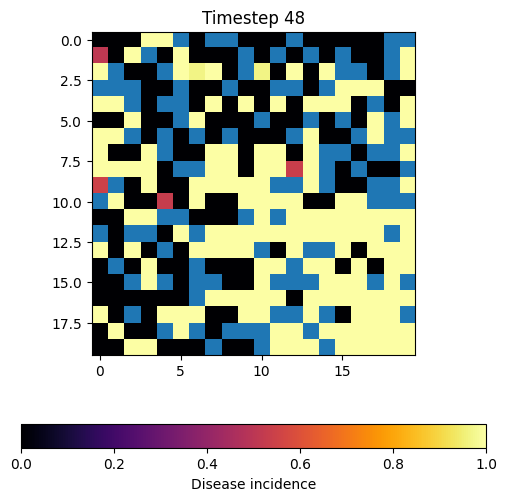

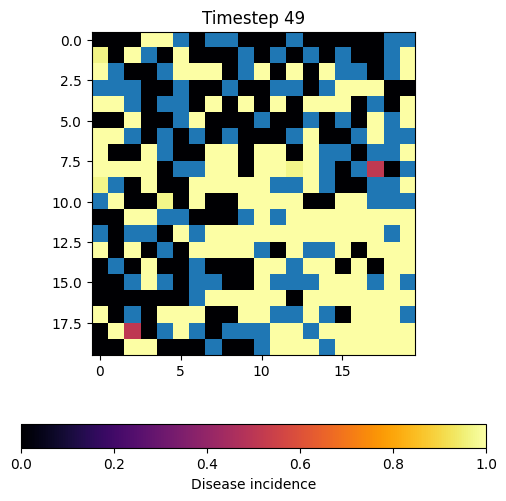

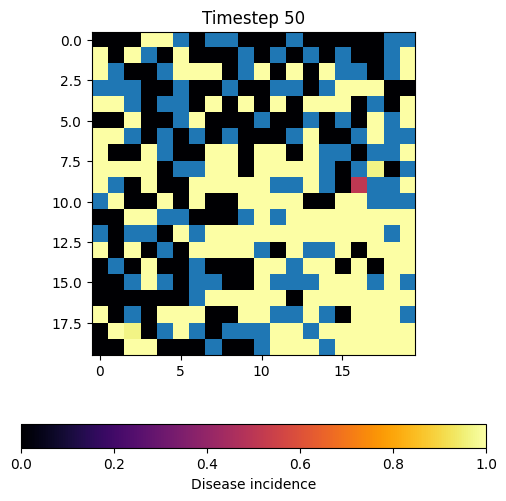

In [14]:
# RUN SIMULATION AND PLOT OUTCOME

GRID.simulate(timesteps, parameters, dispersal_type=dispersal_type)
GRID.plot_incidence(figsize=(6,6))